# Project Description

Context:
You are an analyst at a large online store. Together with the marketing department, you have prepared a list of hypotheses to increase revenue.
Prioritize the hypotheses, run an A/B test, and analyze the results.

## Part 1. Prioritizing Hypotheses

The file /datasets/hypothesis.csv contains 9 hypotheses for increasing the revenue of an online store, with the specified parameters Reach, Impact, Confidence, and Effort.

File /datasets/hypothesis.csv:

Hypothesis — brief description of the hypothesis
Reach — reach of users on a 10-point scale
Impact — impact on users on a 10-point scale
Confidence — confidence in the hypothesis on a 10-point scale
Efforts — resource costs for testing the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive it is to test the hypothesis.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt

In [2]:
pd.set_option('display.max_colwidth', False)

In [3]:
hip= pd.read_csv('hypothesis.csv')

hip

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
### Apply the ICE framework to prioritize the hypotheses. Sort them in descending order of priority.

hip['ICE']=round(((hip['Impact']*hip['Confidence'])/hip['Efforts']), 2)

hip[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
### Apply the RICE framework to prioritize the hypotheses. Sort them in descending order of priority.

hip['RICE']= (hip['Reach']*hip['Impact']*hip['Confidence'])/hip['Efforts']
print(hip[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     Hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

### Indicate how the prioritization of hypotheses changed when applying RICE instead of ICE. Explain why this happened.

- ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») 
- RICE (R от англ. reach, «охват»)

Reach — how many users will be affected by the change you want to implement;
Impact — how significantly the change will affect users, their experience, and satisfaction with the product;
Confidence — how confident you are that this change will impact users as expected;
Efforts — how much it costs to test this hypothesis.

The RICE metric differs from the ICE metric by an additional component - Reach. Reach measures the audience coverage in points. Therefore, in the RICE parameter, hypotheses with 10 points in the Reach column - audience coverage - came to the top positions. Moreover, RICE is opposite to Impact. The greater the audience coverage (Reach), the lesser the influence (Impact).

That is, in the ICE parameter, the first place belongs to hypotheses with a small audience coverage but a strong influence on customers:
1st place: Launch a promotion that gives a discount on the product for a day - few people will see this announcement in a day, but those who do will buy it - this will sharply increase income in the short term.

In the RICE parameter, audience coverage is considered - even with a small influence:
1st place: Add a subscription form to all main pages - large audience coverage - but this will have little effect on purchasing power. This is for the long-term perspective.


### Part 2. Analysis of A/B Test

You conducted an A/B test and obtained results described in the files /datasets/orders.csv and /datasets/visitors.csv.

Analyze the A/B test:

Data for the second part:

File /datasets/orders.csv:

transactionId — order identifier;
visitorId — identifier of the user who made the order;
date — date when the order was made;
revenue — order revenue;
group — A/B test group the order belongs to.
File /datasets/visitors.csv:

date — date;
group — A/B test group;
visitors — number of users on the specified date in the specified A/B test group.

In [6]:
orders = pd.read_csv('orders.csv')
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
visitors = pd.read_csv('visitors.csv')
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [12]:
## Check for duplicates
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

In [14]:
## Check for missing values
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
## Grouped the data by group and counted the quantities in each column.

orders.groupby('group').count()

,transactionId,visitorId,date,revenue
group,,,,
A,557,557,557,557
B,640,640,640,640


In [17]:
## The nunique() method - the count of unique data shows that there are customers who are in both group A and group B.

orders.groupby('group').nunique()

,transactionId,visitorId,date,revenue
group,,,,
A,557,503,31,419
B,640,586,31,450


In [18]:
visitors.groupby('group').count()

,date,visitors
group,,
A,31,31
B,31,31


In [19]:
visitors.groupby('group').nunique()

,date,visitors
group,,
A,31,31
B,31,30


## 1. Plot the cumulative revenue by groups. Make conclusions and assumptions.

To plot the graphs, we need to gather cumulative data. Let's create a DataFrame cumulativeData with the following columns:

date — date;
group — A/B test group (A or B);
transaction_cum — cumulative number of orders on the specified date in the specified group; (*transactionId)
visitorId_cum — cumulative number of users who made at least one order on the specified date in the specified group; (*visitorId)
revenue_cum — cumulative revenue on the specified date in the specified group (average check);
visitors_cum — cumulative number of visitors to the online store on the specified date in the specified group. (*visitors)

In [20]:
# 1. create an array of unique pairs of test date and group values

datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head(3)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A


In [21]:
# 2. Get the rows from the orders table where the date is less than or equal to the date of the element from datesGroups,
# and the test group is equal to the group from datesGroups. This will be the aggregated cumulative data on orders.

import numpy as np

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

### print selected rows from the orders table
ordersAggregated.head(5)


,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [22]:

# 3. Similarly, obtain aggregated cumulative daily data on the visitors of the online store.
# These are the aggregated cumulative DATA on the VISITORS of the online store.

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [23]:
# 4. Merge both tables into one - cumulativeData: 

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group','transaction_cum', 'visitorId_cum','revenue_cum','visitors_cum']

cumulativeData.head(5)

,date,group,transaction_cum,visitorId_cum,revenue_cum,visitors_cum
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### PLOT THE GRAPHS.

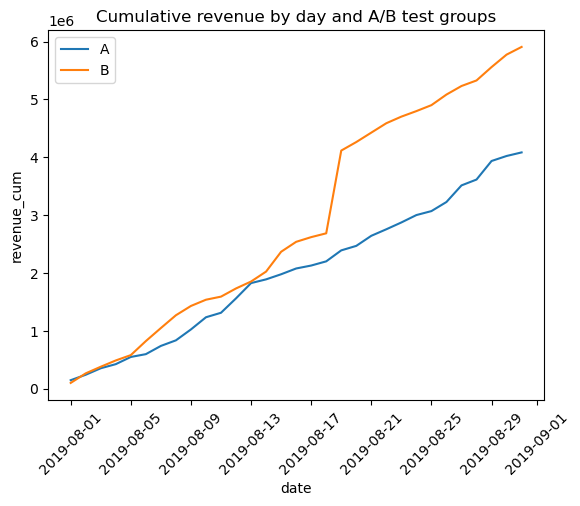

In [24]:
# Let's plot the graphs of cumulative revenue by day and A/B test groups:

import matplotlib.pyplot as plt
import numpy as np

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue_cum', 'transaction_cum']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue_cum', 'transaction_cum']]


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue_cum'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue_cum'], label='B')


## название графика 
plt.title('Cumulative revenue by day and A/B test groups')

plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('revenue_cum')

plt.xticks(rotation=45)# rotated the date at a 45-degree angle
plt.show()

Revenue increases almost evenly throughout the entire test. This is a good sign.
However, the revenue graphs of both groups have several sharp increases at certain points. This may indicate spikes in the number of orders or the appearance of very expensive orders in the sample.

## 2.Plot the graph of the cumulative average order value by groups. Make conclusions and assumptions.

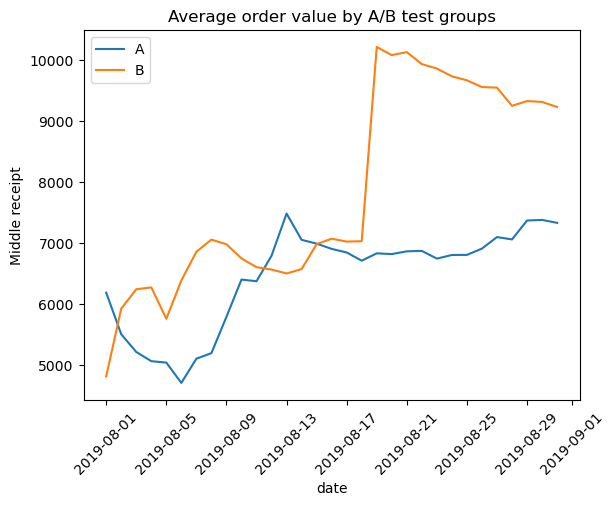

In [25]:
### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue_cum']/cumulativeRevenueA['transaction_cum'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue_cum']/cumulativeRevenueB['transaction_cum'], label='B')

## название графика 
plt.title('Average order value by A/B test groups')

plt.legend(loc='upper left')
plt.xlabel('date')
plt.ylabel('Middle receipt')

plt.xticks(rotation=45)# rotated the date at a 45-degree angle
plt.show()

The average order value also becomes more consistent towards the end of the test: it stabilizes for group B and continues to decline for group A. It is possible that group A received large orders in the first half of the test (a sharp spike in the graph). In that case, group A needs more data to reach the true average order value and stabilize at that level.

## 3. Plot the graph of the relative change in the cumulative average order value of group B compared to group A. Make conclusions and assumptions.

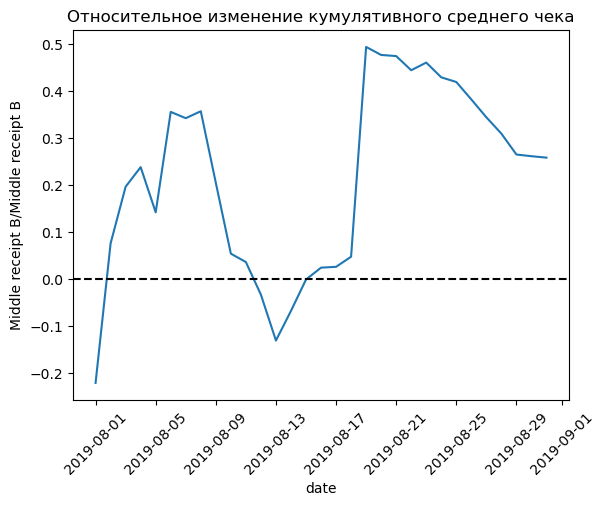

In [26]:
### Add a horizontal axis using the axhline() method (from the English "horizontal line across the axis"):
# collect the data in one DataFrame

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue_cumB']/mergedCumulativeRevenue['transaction_cumB'])/(mergedCumulativeRevenue['revenue_cumA']/mergedCumulativeRevenue['transaction_cumA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

## название графика 
plt.title('Относительное изменение кумулятивного среднего чека')


plt.ylabel('Middle receipt B/Middle receipt B')
plt.xlabel('date')

plt.xticks(rotation=45)# повернули дату под углом 45 градусов
plt.show()

At several points, the graph of the difference between the segments fluctuates sharply. There are definitely some large orders and outliers hidden somewhere!

## 4.	Plot the graph of the cumulative average number of orders per visitor by groups. Make conclusions and assumptions.

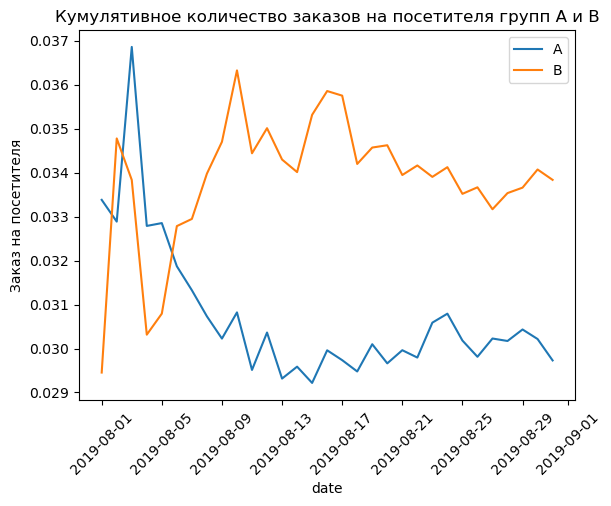

In [27]:
# считаем количество заказов на 1 посетителя
cumulativeData['conversion'] = cumulativeData['transaction_cum']/cumulativeData['visitors_cum']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

## название графика 
plt.title('Кумулятивное количество заказов на посетителя групп А и В')

## x и y 
plt.xlabel('date')
plt.ylabel('Заказ на посетителя')


# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.xticks(rotation=45)# повернули дату под углом 45 градусов

plt.legend(loc='upper right')
plt.show()

The graph turned out to be symmetrical! The groups fluctuated around the same value, but then the number of orders in group B surged ahead and stabilized, while the number of orders in group A declined and also stabilized.

## 5. Plot the graph of the relative change in the cumulative average number of orders per visitor in group B compared to group A. Make conclusions and assumptions.

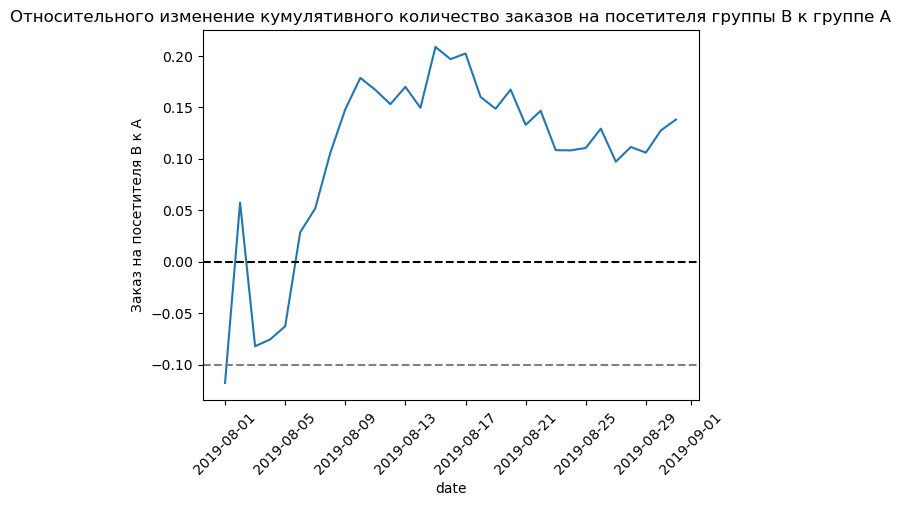

In [28]:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")



plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

## название графика 
plt.title('Относительного изменение кумулятивного количество заказов на посетителя группы B к группе A')

## x и y 
plt.xlabel('date')
plt.ylabel('Заказ на посетителя В к А')

plt.xticks(rotation=45)# повернули дату под углом 45 градусов


plt.show()


At the beginning of the test, group A significantly outperformed group B, then group B surged ahead. After that, the number of orders dropped again, but now it is gradually increasing.
Overall, the ratio of group B to group A has not yet stabilized, and it is currently not possible to make any conclusions from the test. However, it is worth analyzing the anomalies first, as they might change the overall picture.


## 6.	Plot a scatter plot of the number of orders per user. Make conclusions and assumptions.

Файл /datasets/orders.csv. 

•transactionId — идентификатор заказа;
•visitorId — идентификатор пользователя, совершившего заказ;

In [29]:
## Introduce a variable to identify unique users and
## add the number of unique items using 'nunique':

orders_2 = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_2.columns = ['userId', 'orders']

print(orders_2.sort_values(by='orders', ascending=False).head(5))

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     


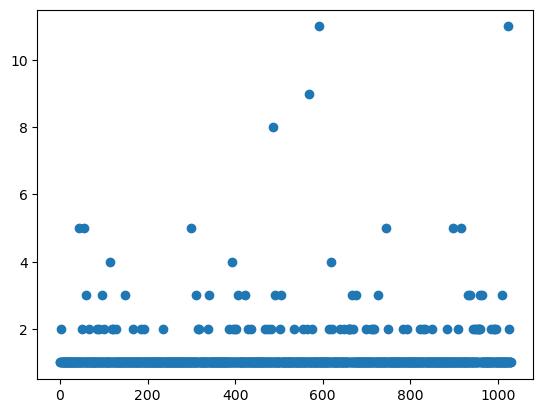

In [30]:
## Let's plot a diagram using the scatter() method, passing values for the X and Y axes to it.

x_values = pd.Series(range(0, len(orders_2)))
plt.scatter(x_values, orders_2['orders']) 

Users who placed more than 2 orders are very few. They may very well be outliers. Whether 2 orders are normal or a lot will be answered by calculating sample percentiles.

## 7.	Calculate the 95th and 99th percentiles of the number of orders per user. Choose a threshold for determining anomalous users.

Let's calculate the 95th and 99th sample percentiles of the number of orders per user using the np.percentile() method.

In [31]:
## Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили

import numpy as np
print(np.percentile(orders_2['orders'], [95, 99])) 

[2. 4.]


No more than 5% of users made more than 2 orders, and no more than 1% of users made more than 4 orders. The threshold for an abnormal number of orders is set at more than 2 orders.

## 8.	Plot a scatter plot of order values. Make conclusions and assumptions.

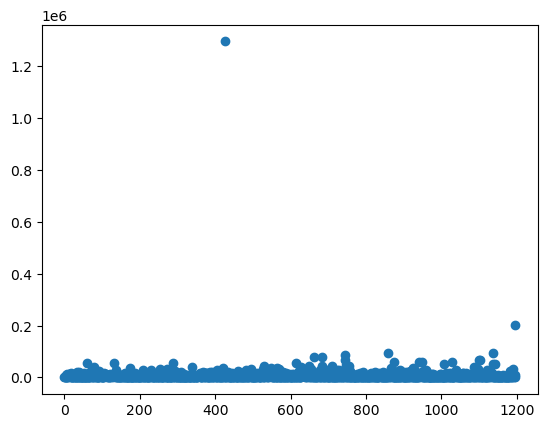

In [32]:
##  Построим диаграмму методом scatter(). Напомним, что ему передают значения по осям X и Y. 
## Значения по горизонтальной оси есть в прекоде, в переменной x_values — сгенерированные номера наблюдений. 
## Значения для вертикальной оси возьмём из столбца 'revenue' датафрейма orders.

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

There is an outlier around 1.2 million rubles and around 200 thousand rubles. An order of 1.2 million rubles looks anomalous.

## 9.	Calculate the 95th and 99th percentiles of order values. Choose a threshold for determining anomalous orders.
revenue — order revenue

In [33]:
# Передадим методу np.percentile() столбец 'revenue' датафрейма orders 
# и список перцентилей — [95, 99]
##import numpy as np
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


No more than 5% of orders have a value higher than 28,000 rubles. And no more than 1% of orders have a value higher than 58,233 rubles. The threshold for abnormal order values is anything above 28,000 rubles, which is considered an anomaly.

## 10.	Calculate the statistical significance of the differences in the average NUMBER of orders per visitor between the groups using "raw" data.

First, we will assemble the table - data.

File /datasets/orders.csv:

transactionId — order identifier;
visitorId — user identifier who made the order;
date — date when the order was made;
revenue — order revenue;
group — A/B test group the order belongs to.

#### Начинаем с таблицы visitors

In [34]:
## 1. visitorsA,B — количество пользователей в выбранную дату в группе A,B:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsADaily.head(5)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [35]:
visitorsBDaily.head(5)

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [36]:
## 2. пункт

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsACummulative.head(3)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845


#### Now let's proceed to the orders table.

In [37]:
## 1. пункт. Делаем 2 датафрейма, где в каждом данные сгруппированны по дате и применены агрегирующие
## функции.

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']


ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [38]:
ordersADaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             31 non-null     datetime64[ns]
 1   ordersPerDateA   31 non-null     int64         
 2   revenuePerDateA  31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 872.0 bytes


In [39]:
ordersADaily['date'] = pd.to_datetime(ordersADaily['date'])
ordersBDaily['date'] = pd.to_datetime(ordersBDaily['date'])

In [40]:
## 2 пункт - КУМУЛЯТИВНЫЕ ДАННЫЕ-нарастающие данные. Применена функция lambda.

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


### Now let's proceed to create the data table. Combine using .merge().

In [41]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

##### Напомним названия столбцов данных:

date — дата;

ordersPerDateA — количество заказов в выбранную дату в группе A;

revenuePerDateA — суммарная выручка в выбранную дату в группе A;

ordersPerDateB — количество заказов в выбранную дату в группе B;

revenuePerDateB — суммарная выручка в выбранную дату в группе B;

ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;

revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;

ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;

revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;

visitorsPerDateA — количество пользователей в выбранную дату в группе A;

visitorsPerDateB — количество пользователей в выбранную дату в группе B;

visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;

visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


#### Let's calculate the statistical significance of the difference in the average number of orders between the groups.


In [42]:
## 1. Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
## В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersA.head(5)

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1



##2. Declare the variables sampleA and sampleB, where the users from different groups will correspond to the number of orders.

Those who did not order anything will correspond to zeros. This is needed to prepare the samples for the Mann-Whitney test.

The variable sampleA should consist of two parts:

1. A list with the number of orders for each user: ordersByUsersA['orders'].

2. Zeros for users who did not order anything. Their number is equal to the difference between the total number of visitors and the number of order records:

data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Create a pd.Series object of the required length:


In [43]:

## Created a list of indices using the np.arange() function.
## It works just like the range() function, but creates an array of indices in the np.array format, which is required in pd.Series.

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [44]:

## In Pandas, sequences are combined using the pd.concat() function (from the word concatenate, "to link together").
## First, pass what you want to combine — in our case, a list of the first and second parts.
## Then, pass an argument indicating that the Series objects should be combined by rows (i.e., written one after the other): pd.concat([...], axis=0). 
## Do the same for sampleB and get:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

sampleA.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: orders, dtype: int64

#### Apply the test and format the p-value, rounding it to three decimal places.

Recall that in sampleA, we have saved a sample where each element is the number of orders for a specific user, including zero. Therefore, the number of elements in sampleA is the number of users, and the sum of all elements is the number of orders. To get the average number of orders per user, divide the total number of orders by the number of users — find the mean in sampleA using the mean() method. Similarly, find the mean for group B: sampleB.mean().

Output the relative increase in the average number of orders for group B: average number of orders for group B / average number of orders for group A - 1. Round to three decimal places.

Null hypothesis: There are no statistically significant differences in the average number of orders between the groups. Alternative hypothesis: There are differences in the average number of orders between the groups.

In [45]:
## p-value- статистическая значимость:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

##  относительный прирост среднего числа заказов группы B
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


### Conclusion: According to the "raw" data, there are DIFFERENCES in the average NUMBER OF ORDERS between groups A and B.

The first number — p-value = 0.017 < 0.05. Therefore, we reject the null hypothesis that there are no statistically significant differences in the average number of orders between the groups. However, the relative gain of group B is 13.8% — the second number in the conclusion. Segment B is significantly better than segment A.

## 11.	Calculate the statistical significance of the difference in the average order value between the groups using "raw" data.

Make conclusions and assumptions.

Null hypothesis: There are no differences in the average order value between the groups.
Alternative hypothesis: There are differences in the average order value between the groups.

To calculate the statistical significance of the difference in the average order value, we will pass the revenue data from orders to the Mann-Whitney U test.
We will also find the relative differences in the average order value between the groups:

In [46]:
## статистическая значимость различий в среднем чеке - P-value
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

## относительные различия в среднем чеке между группами
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Conclusion: P-value (0.729) > 0.05. There are no differences in the average order value between the groups.

Thus, the null hypothesis is not rejected.
Moreover, the relative difference in the average order value between segments B and A is only 25.9%.


Recall that the 95th and 99th percentiles of average order values are 28,000 and 58,233 rubles, respectively. The 95th and 99th percentiles of the number of orders per user are 2 and 4 orders per user.

We will consider users who have made 2 or more orders or placed an order worth more than 28,000 rubles as anomalous users. This way, we will exclude 5% of users with the highest number of orders and 1% to 5% of users with expensive orders.

We will create slices of users with more than 2 orders — usersWithManyOrders and users who placed orders worth more than 28,000 — usersWithExpensiveOrders.

We will combine them into the abnormalUsers table.
Let's find out the total number of anomalous users using the shape attribute.

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Conclusion: There are a total of 74 anomalous users.

## 12.	Calculate the statistical significance of the difference in the average number of orders per visitor between the groups using "cleaned" data.


Null Hypothesis

Let's find out how their actions affected the test results. Calculate the statistical significance of the difference in the average number of orders between the test groups using cleaned data. First, prepare the samples of the number of orders per user by test groups:

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Null hypothesis: There are no statistically significant differences in the average number of orders between the groups.
Alternative hypothesis: There are differences in the average number of orders between the groups.

In [49]:
## Apply the Mann-Whitney statistical test to the obtained samples:

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Conclusion: The null hypothesis is rejected - there are differences in the average number of orders between the groups.

The results for the average number of orders have changed.
Previously: 0.017
0.138

## 13.	Calculate the statistical significance of the difference in the average order value between the groups using "cleaned" data.

Null hypothesis: There are no differences in the average order value between the groups. Alternative hypothesis: There are differences in the average order value between the groups.

In [50]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value increased slightly, by 0.9 points.

Conclusion: P-value (0.738) > 0.05. There are no differences in the average order value between the groups.

The difference between the segments increased from 25.9% to -2%. There were many outliers in group A.
The overall conclusions from the test have changed; this example clearly shows how much anomalies can affect A/B test results!

Previously: 0.729 and 0.259


## 14.	Make a decision based on the test results and explain it. Possible decisions:

1. Stop the test and declare one of the groups as the winner.
2. Stop the test and declare no differences between the groups.
3. Continue the test.

10. Calculate the statistical significance of the difference in the average number of orders per visitor between the groups using "raw" data.

Null hypothesis: There are no statistically significant differences in the average number of orders between the groups. Alternative hypothesis: There are differences in the average number of orders between the groups.
0.017 < 0.05 – the null hypothesis is rejected

0.017
0.138

Conclusion: According to the "raw" data, there are DIFFERENCES in the average NUMBER OF ORDERS between groups A and B.

11. Calculate the statistical significance of the difference in the average order value between the groups using "raw" data.
Null hypothesis: There are no differences in the average order value between the groups. Alternative hypothesis: There are differences in the average order value between the groups.

0.729
0.259

Conclusion: P-value (0.729) > 0.05. There are no differences in the average order value between the groups.

Thus, the null hypothesis is not rejected. Moreover, the relative difference in the average order value between segments B and A is only 25.9%.

12. Calculate the statistical significance of the difference in the average number of orders per visitor between the groups using "cleaned" data.
Null hypothesis: There are no statistically significant differences in the average number of orders between the groups.
Alternative hypothesis: There are differences in the average number of orders between the groups. Let's see how their actions affected the test results.
0.013
0.173

Conclusion: P-value (0.013) < 0.05. There are differences in the average number of orders between the groups.

Previously: 0.017
0.138

13. Calculate the statistical significance of the difference in the average order value between the groups using "cleaned" data.
Null hypothesis: There are no differences in the average order value between the groups. Alternative hypothesis: There are differences in the average order value between the groups.

0.738
-0.020

Conclusion: P-value (0.738) > 0.05. There are no differences in the average order value between the groups.


What conclusions can we draw from the test?

Existing facts:

1. According to both "raw" and "cleaned" data, there are statistically significant differences in the average NUMBER of orders between groups A and B.

2. According to both "raw" and "cleaned" data, there are no statistically significant differences in the average ORDER VALUE between groups A and B.

The graph of the difference in the average number of orders between the groups shows that the results of group B are better than those of group A and there is no significant trend for improvement.

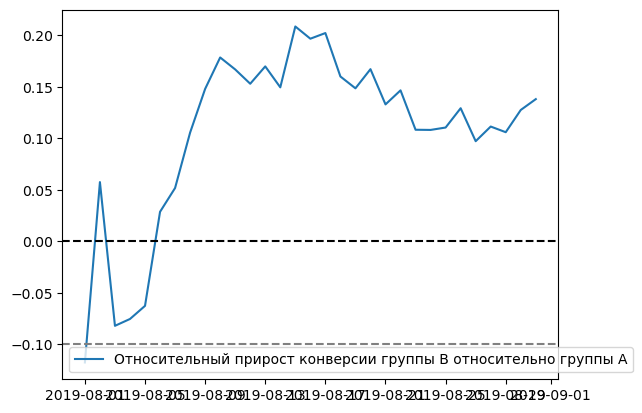

In [51]:
## The graph of the difference in the average number of orders between the groups shows that the results of group B 
## are better than those of group A.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

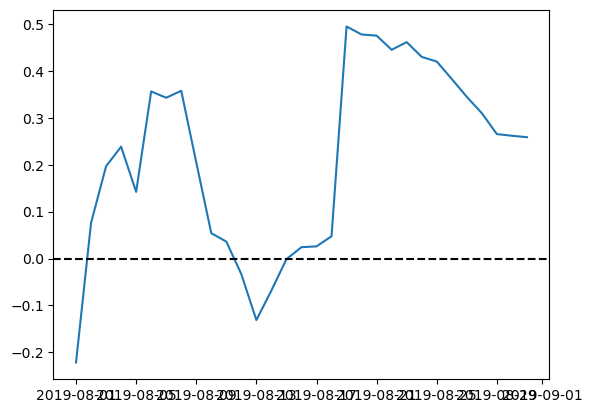

In [52]:
## The graph of the difference in average order values shows that the results of group B are improving day by day.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plot the ratio of average order values
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue_cumB']/mergedCumulativeRevenue['transaction_cumB'])/(mergedCumulativeRevenue['revenue_cumA']/mergedCumulativeRevenue['transaction_cumA'])-1)

# add the X-axis
plt.axhline(y=0, color='black', linestyle='--')


Based on the findings, the test should be STOPPED and considered successful, and move on to testing the next hypothesis.